In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import torch
import numpy as np
from neuralnet import SQNet
from utils import solve_crocoddyl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sqnet = torch.load("sqnet.pth")

In [4]:
# Generate test data
xrange = np.linspace(-1.,1.,100)
xtest = torch.tensor([ [x1,x2, 0.] for x1 in xrange for x2 in xrange ], dtype = torch.float32)

In [5]:
# Get the true cost by solving crocoddyl
y_true = []
for xyz in xtest:
    xyz = xyz.numpy()
    ddp = solve_crocoddyl(xyz)
    y_true.append([ddp.cost])
y_true = np.array(y_true)
y_true = torch.tensor(y_true, dtype = torch.float32)

In [7]:
# Predictions
sqnet.eval()
with torch.no_grad():
    y_pred = sqnet(xtest)

error = (y_true - y_pred)
print(f"Mean Squared Error during testing is {torch.mean(error ** 2)}")
print("......................................................................")   

Mean Squared Error during testing is 61.91741180419922
......................................................................


In [8]:
y_pred.shape

torch.Size([10000, 1])

In [9]:
error = (y_true - y_pred)


In [10]:
error

tensor([[18.1106],
        [17.6137],
        [17.1252],
        ...,
        [16.7896],
        [17.2816],
        [17.7818]], grad_fn=<SubBackward0>)

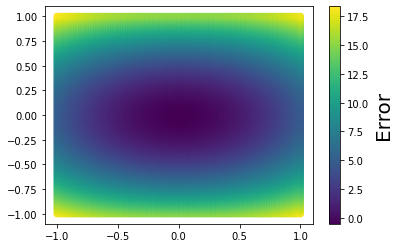

In [11]:
plt.clf()
plt.scatter(xtest.numpy()[:,0], xtest.numpy()[:,1], c = error.detach().numpy())
plt.colorbar().set_label("Error", labelpad = 4, fontsize = 20)


In [12]:
y_pred

tensor([[0.2011],
        [0.1975],
        [0.1940],
        ...,
        [0.5296],
        [0.5297],
        [0.5299]], requires_grad=True)